1： Matplotlib做图入门网址：http://python.jobbole.com/87471/

In [33]:

import matplotlib.pyplot as plt
import matplotlib

import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import wave
%matplotlib inline

In [28]:
#1.generator txt data

def rand_generator(rows = 100, cols = 1, mu = 0.0, stdvar = 1.0):
    np.random.seed(1)
    fid = open("tdata.txt",'w')
    data = stdvar * np.random.randn(rows, cols) + mu
    for i in range(rows):
        for j in range(cols):
            fid.write("%s\t"%data[i,j])
        fid.write("\n")
    fid.close()
    return data
        

In [29]:
#test rand_generator
rand_generator()

array([[ 1.62434536],
       [-0.61175641],
       [-0.52817175],
       [-1.07296862],
       [ 0.86540763],
       [-2.3015387 ],
       [ 1.74481176],
       [-0.7612069 ],
       [ 0.3190391 ],
       [-0.24937038],
       [ 1.46210794],
       [-2.06014071],
       [-0.3224172 ],
       [-0.38405435],
       [ 1.13376944],
       [-1.09989127],
       [-0.17242821],
       [-0.87785842],
       [ 0.04221375],
       [ 0.58281521],
       [-1.10061918],
       [ 1.14472371],
       [ 0.90159072],
       [ 0.50249434],
       [ 0.90085595],
       [-0.68372786],
       [-0.12289023],
       [-0.93576943],
       [-0.26788808],
       [ 0.53035547],
       [-0.69166075],
       [-0.39675353],
       [-0.6871727 ],
       [-0.84520564],
       [-0.67124613],
       [-0.0126646 ],
       [-1.11731035],
       [ 0.2344157 ],
       [ 1.65980218],
       [ 0.74204416],
       [-0.19183555],
       [-0.88762896],
       [-0.74715829],
       [ 1.6924546 ],
       [ 0.05080775],
       [-0

In [30]:
#2.load data, suppose #col datas per line
def load_datasets(filename, col = 1):
    fid = open(filename, 'r')
    lines = fid.readlines()
    rows = len(lines)
    data = np.zeros((rows, col))
    cnt = 0
    for line in lines:
        data[cnt,:] = line.strip()
        cnt += 1
    return data

In [31]:
#testloaddata
data = load_datasets("tdata.txt")
print(str(data))

[[ 1.62434536]
 [-0.61175641]
 [-0.52817175]
 [-1.07296862]
 [ 0.86540763]
 [-2.3015387 ]
 [ 1.74481176]
 [-0.7612069 ]
 [ 0.3190391 ]
 [-0.24937038]
 [ 1.46210794]
 [-2.06014071]
 [-0.3224172 ]
 [-0.38405435]
 [ 1.13376944]
 [-1.09989127]
 [-0.17242821]
 [-0.87785842]
 [ 0.04221375]
 [ 0.58281521]
 [-1.10061918]
 [ 1.14472371]
 [ 0.90159072]
 [ 0.50249434]
 [ 0.90085595]
 [-0.68372786]
 [-0.12289023]
 [-0.93576943]
 [-0.26788808]
 [ 0.53035547]
 [-0.69166075]
 [-0.39675353]
 [-0.6871727 ]
 [-0.84520564]
 [-0.67124613]
 [-0.0126646 ]
 [-1.11731035]
 [ 0.2344157 ]
 [ 1.65980218]
 [ 0.74204416]
 [-0.19183555]
 [-0.88762896]
 [-0.74715829]
 [ 1.6924546 ]
 [ 0.05080775]
 [-0.63699565]
 [ 0.19091548]
 [ 2.10025514]
 [ 0.12015895]
 [ 0.61720311]
 [ 0.30017032]
 [-0.35224985]
 [-1.1425182 ]
 [-0.34934272]
 [-0.20889423]
 [ 0.58662319]
 [ 0.83898341]
 [ 0.93110208]
 [ 0.28558733]
 [ 0.88514116]
 [-0.75439794]
 [ 1.25286816]
 [ 0.51292982]
 [-0.29809284]
 [ 0.48851815]
 [-0.07557171]
 [ 1.13162

In [54]:
#3. plot
def plot_data(data ):
    np.random.seed(3)
    m,n = data.shape
    nfft = int(np.exp2(np.ceil(np.log2(1.0 * m))))
    
    ax = plt.figure("Data and its FFT")

    cscale = np.random.rand()
    ax1 = ax.add_subplot(211)
    ax2 = ax.add_subplot(212)
    for i in range(n):
        color = np.random.randn()
        ax1.plot(data[:, i], label="The "+str(i)+"col")
        ax2.plot(np.abs(np.fft.fft(data[:,i], nfft)[:(nfft//2)]), label="The "+str(i)+"col")
        
    ax1.set_ylabel("Amp")
    ax2.set_ylabel("Amp")
    ax1.grid(True)
    ax2.grid(True)
    
    plt.show()
    

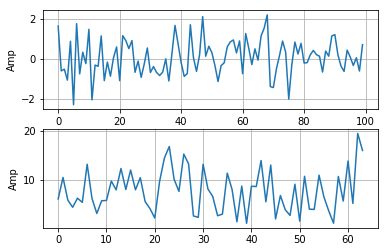

In [55]:
#test plot
plot_data(data)

In [59]:
# 4. plot stft
def plot_stft(data, dshift = 160, dsize = 400, nfft = 512):
    data = data.reshape((-1, 1))
    datalen = len(data)
    #nfft = int(np.exp2(np.ceil(np.log2(1.0 * m))))
    framenum = (datalen - dsize)//160 + 1
    dtmp = np.zeros((framenum, dsize))
    for i in range(framenum):
        dtmp[i, :] = data[i * dshift: i * dshift + dsize].T
    ffttmp = np.abs(np.fft.fft(dtmp, nfft)[:,:nfft//2])
    ffttmp = np.flip(ffttmp.T,0)
    ffttmp = 10 * np.log10(ffttmp + 0.00001)
     
    
    x = np.linspace(0, framenum, framenum)
    y = np.linspace(0, nfft//2, nfft//2)
    X, Y = np.meshgrid(x, y)
    print(ffttmp.shape)
    print(X.shape)
    print(Y.shape)
    fig = plt.figure("STFT")
    ax1 = fig.add_subplot(211, projection = '3d')
    ax1.plot_surface(X, Y, ffttmp, alpha=0.7, cmap='jet')
    ax2 = fig.add_subplot(212)
    ax2.imshow(ffttmp, cmap='jet')
    #plt.show()
    
    
    

(98, 256)
(256, 98)
(256, 98)


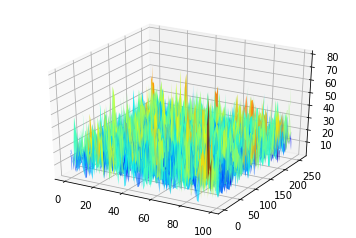

In [97]:
#test stft
data = rand_generator(rows =16000)
plot_stft(data)

In [3]:
#5. load wav
def wavread(filename):
    wav_read = wave.open(filename, "r")
    nchannels, sampwidth, samprate, nframes, _, _ = wav_read.getparams()
    char_data = wav_read.readframes(nframes)
    wav_read.close()
    wav_data = np.frombuffer(char_data, dtype = np.short)
    wav_data.shape = -1, nchannels
    wav_data = wav_data.T
    time = np.arange(0, nframes) * 1.0 / samprate
    return wav_data, time
    
    

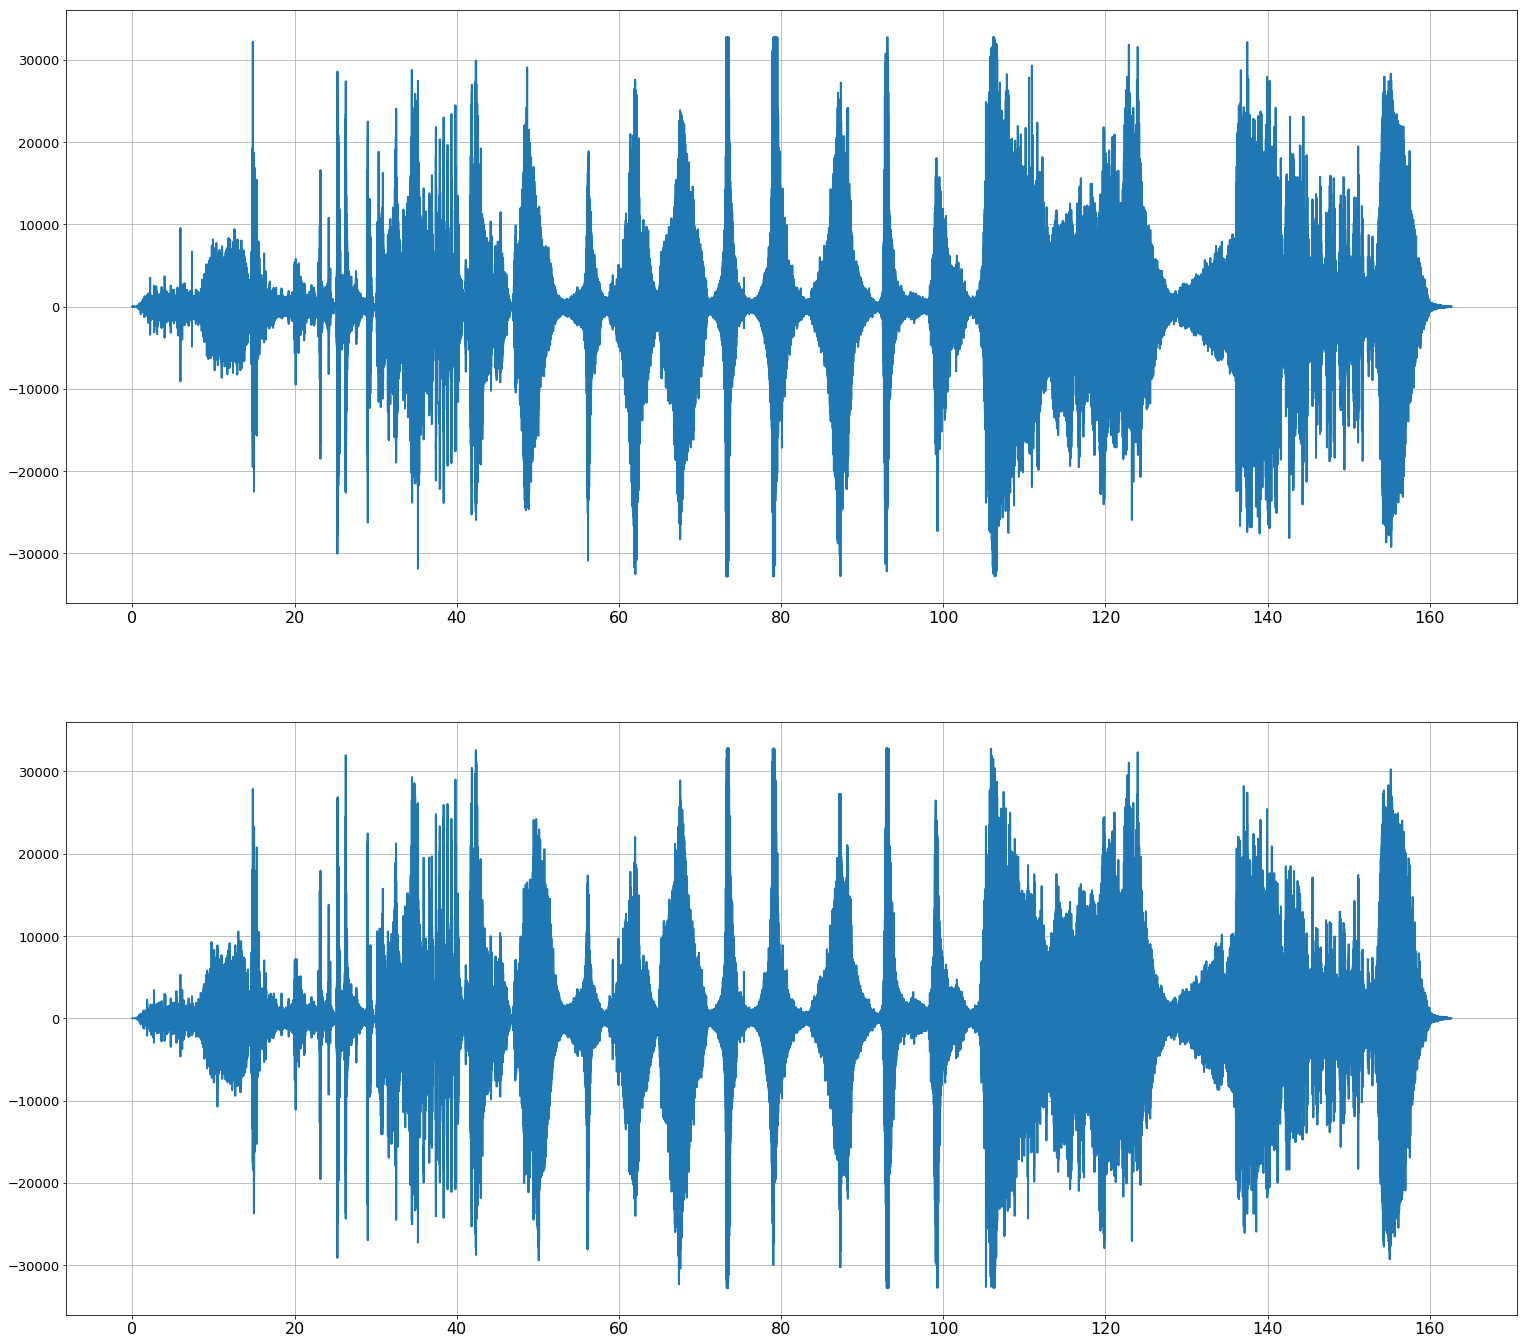

In [58]:
# test load wav
data, time = wavread("stereo.wav")

m,n = data.shape

fig = plt.figure("testwav")
if m == 1:
    ax = fig.add_subplot(111)
    ax.plot(time, data)
elif m == 2:
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.plot(time, data[0])
    ax1.grid(True)
    ax2.plot(time, data[1])
    ax2.grid(True)
#plt.show()



(256, 2436)
(256, 2436)
(256, 2436)


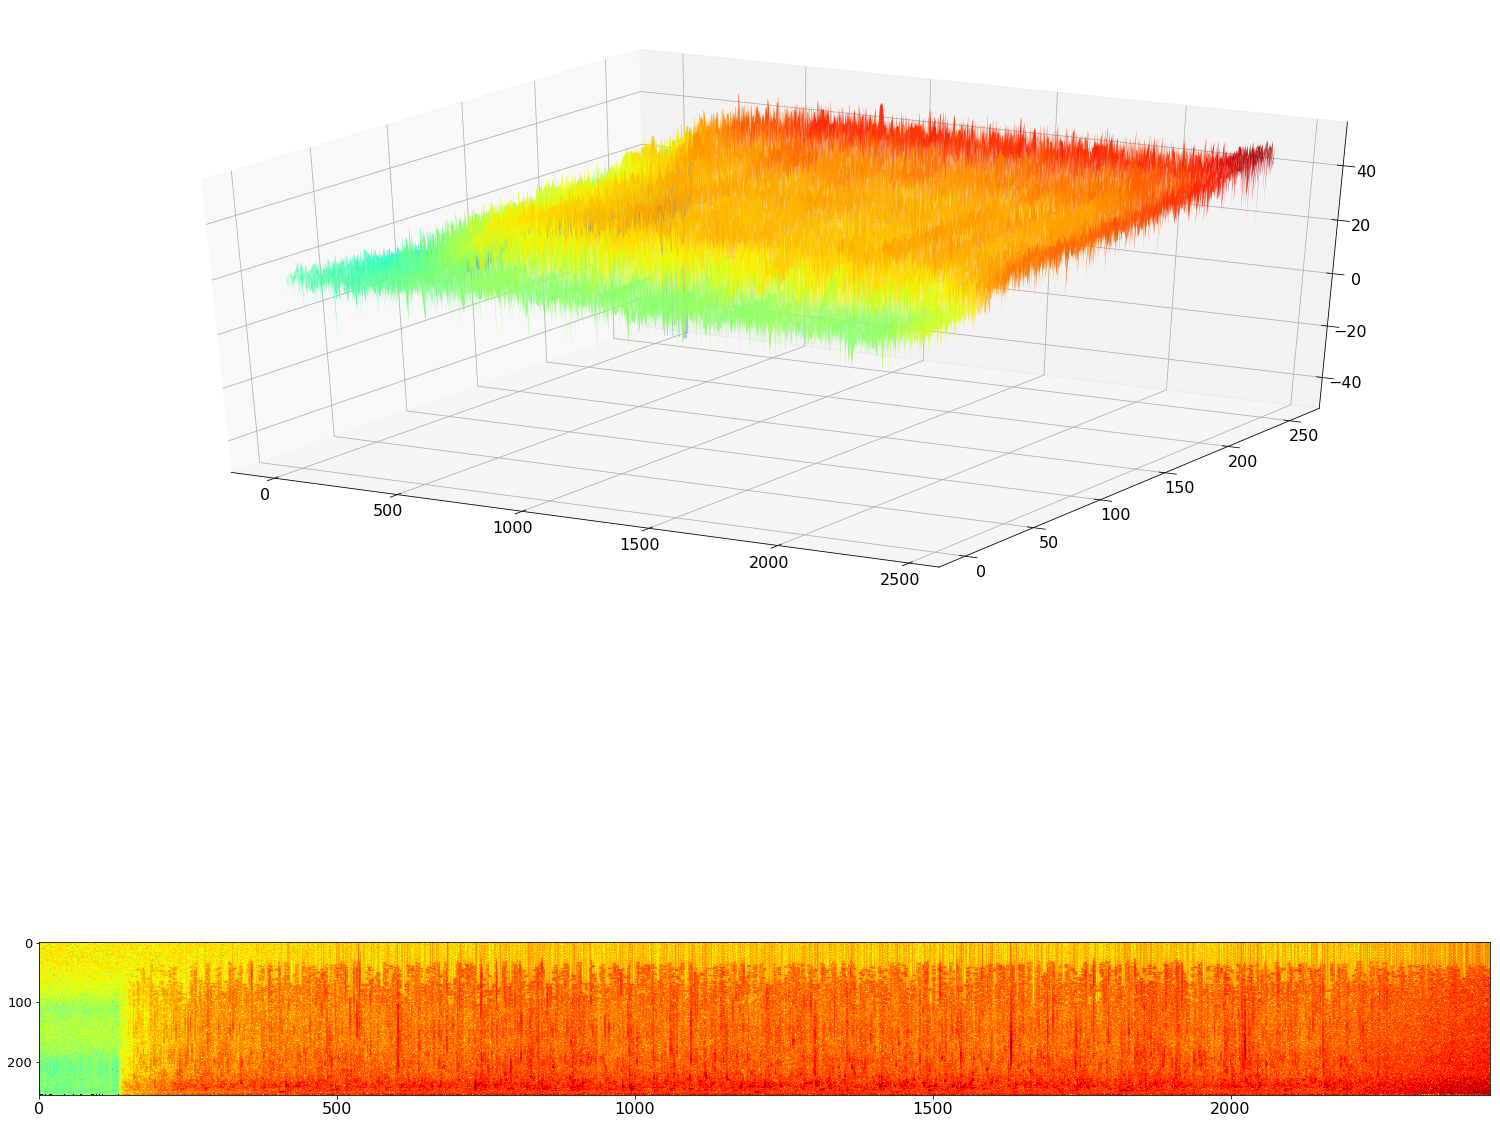

In [60]:
# test stft
# 绘图参数全家桶
params = {
            'axes.labelsize': '16',
            'xtick.labelsize': '16',
            'ytick.labelsize': '13',
            'lines.linewidth': '2',
            'legend.fontsize': '20',
            'figure.figsize': '26, 24'  # set figure size
}
matplotlib.rcParams.update(params)

data, time = wavread("stereo.wav")

m,n = data.shape
dtmp = data[0,0:390000]
plot_stft(dtmp)

(64, 64)
(16384,)


/home/sf-wrj/anaconda3/envs/tf5/lib/python3.5/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 255.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


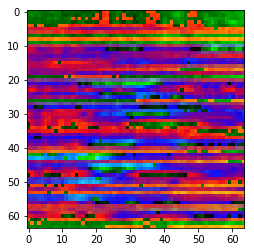

In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import misc
import imageio
%matplotlib inline

img = Image.open('test1.png')
imgdata = img.load()

print(img.size)
w,h = img.size
data = np.zeros((w, h, 4))
for i in range(w):
    for j in range(h):
        data[i,j,:] = imgdata[i, j]
        #print(data)
imageio.imwrite('testest.png',data)
tmp = data.reshape((-1))
print(tmp.shape)
imageio.imwrite('ttest2.png',
plt.imshow(data[:,:,0:3])
fid = open('test.txt', 'w')
for i in range(w):
    for j in range(h):
        fid.write(str(data[i, j,  0]))
    fid.write('\n')
fid.close()
